###Modelo de Red Neuronal para clasificación con función XOR

In [156]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from sklearn.cross_validation import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

#### 1) Se definen la funcion de clasificación XOR y generamos sets de datos

In [120]:
fn_xor = pd.DataFrame(np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]]),columns=["X1","X2","Y"])

In [157]:
data = fn_xor
for i in range(100):
   data = data.append(fn_xor)
data = data.reset_index(drop=True)
print(data.head())
print(data.describe())

   X1  X2  Y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0
4   0   0  0
              X1         X2          Y
count  404.00000  404.00000  404.00000
mean     0.50000    0.50000    0.50000
std      0.50062    0.50062    0.50062
min      0.00000    0.00000    0.00000
25%      0.00000    0.00000    0.00000
50%      0.50000    0.50000    0.50000
75%      1.00000    1.00000    1.00000
max      1.00000    1.00000    1.00000


####2) Separamos porcentaje de entrenamiento y visualizamos

In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(data[["X1","X2"]],data[["Y"]], train_size=0.75)
print len(X_train), len(X_test)

303 101


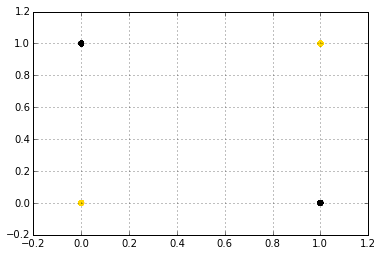

In [145]:
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], 
            color=['black' if i==0 else 'gold' for i in Y_train.iloc[:,0]] )
plt.grid()

####3) Definimos una topología para la red

In [146]:
# Neuronas en capa entrada, cuantas neuronas en capa intermedia, capa final
net = buildNetwork(2, 3, 1)
ds = SupervisedDataSet(2, 1)

In [147]:
ds.setField('input', X_train[["X1","X2"]])
ds.setField('target', Y_train[["Y"]])

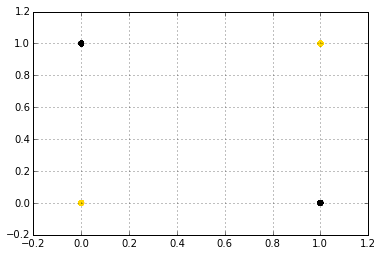

In [148]:
plt.scatter(ds['input'][:,0], ds['input'][:,1],
            color=['black' if i==1 else 'gold' for i in ds['target']])
plt.grid()

####4) Se entrena la red con el método backpropagation

In [149]:
entrena=500
trainer = BackpropTrainer(net,ds) 
for i in range(entrena):
    trainer.train()
print("entrenó")

entrenó


#### 5) Visualización de clasificación con red neuronal

In [115]:
cm = plt.cm.get_cmap('afmhot')
x1t = np.arange(-4.01,4.00,0.01) 
x2t = []
x3t = []
z = []

In [116]:
for i in range(len(x1t)):
    for j in range(len(x1t)):
        x2t.append(x1t[i])
        x3t.append(x1t[(len(x1t)-1)-j])
        xtemp = [x1t[i],x1t[(len(x1t)-1)-j]]
        z.append(net.activate(xtemp))

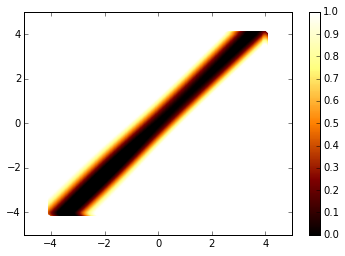

In [155]:
sc = plt.scatter(x2t, x3t, c=z, vmin=0, vmax=1, s=30, cmap=cm, edgecolors='none')
plt.colorbar(sc)
plt.show()